# 좋은 훈련 데이터셋 만들기 : 데이터 전처리
- 데이터의 샘플을 제거하거나 다른 샘플의 특성에서 누락된 값을 대체하는 방법

In [2]:
# table형태 데이터에서 누락된 값 식별 
import pandas as pd 
from io import StringIO # 이 모듈을 이용하면 csv_data에 저장된 문자열을 읽어서 pandas의 dataframe로 변환이 가능
csv_data = \
    '''
    A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0
    '''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
# isnull : 각 셀마다 누락된 데이터(NaN)같은 데이터의 수를 체크해줌 
df.isnull().sum()

    A    0
B        0
C        1
D        1
dtype: int64

In [4]:
df.values # 이렇게 하면 바로 numpy 배열을 얻을 수 있음

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [5]:
# 누락된 값이 있는 훈련 샘플이나 특성 제외 
# 누락된 데이터를 지워버리는게 가장 단순하고 쉬운 누락데이터 처리방식임
# 이 때 dropna 함수를 사용할 수 있음
df.dropna(axis = 0) # 누락된 값이 있는 행을 날려버림 , axis = 1로 하면 열을 날려버림

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
# 모든 열의 값이 NaN일 때만 행을 삭제 
df.dropna(how = 'all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
# NaN이 아닌 값이 4개보다 작은 행을 삭제
df.dropna(thresh = 4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(subset=['C']) # [] <- 이 열에 NaN값이 있는 행만 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


# 누락된 값 대체 
- 누락된 값을 다 날려버리면 편하기는 한데 그만큼 데이터도 많이 잊어버려서
- 별로일 수 있음
- 그렇기 때문에 누락된 값을 대체하는 것이 더 좋은 방법일 수 있음
- 가장 흔한 방법은 평균으로 누락값을 대체하는 것

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan , strategy='mean') # np.nan값을 -> mean값으로 대체해라 (mean값 내는 것은 열 기준임)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data # 결과 확인해보면 위의 설명과 동일하게 해당 열의 평균값으로 채워진 것 확인 가능

# strategy값은 median , most_frequent로도 해결이 가능

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [10]:
# 누락된 값을 채우는 더 쉬운 방법은 pandas에서 fillna의 매개변수로 누락된 값을 채울 방법을 전달하는 것
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


# 범주형 데이터 다루기 
- 범주형 데이터를 이야기할 때 순서가 있는 것과 없는 것을 구분해야 함
- 순서가 있는 특성을 정렬하거나 차례대로 놓을 수 있는 범주형 특성으로 생각이 가능

In [11]:
# pandas를 사용한 범주형 데이터 인코딩 
import pandas as pd 
df = pd.DataFrame([
    ['green' , 'M' , 10.1 , 'class2'],
    ['red' , 'L' , 13.5 , 'class1'],
    ['blue' , 'XL' , 15.3 , 'class2']
])
df.columns = ['color' , 'size' , 'price' , 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [12]:
# 학습 알고리즘이 순서 특성을 올바르게 인식하려면 범주형의 문자열 값을 정수로 변경시켜줘야 함

size_mapping = {
    'XL' : 3,
    'L' : 2,
    'M' : 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [13]:
# 정수 값을 다시 원래 문자열로 변경하려면 거꾸로 매핑하는 딕셔너리를 정의하면 됨

inv_size_mapping = {
    v : k for k , v in size_mapping.items()
}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [14]:
# class label 인코딩

import numpy as np 
class_mapping = {label : idx for idx , label in 
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [15]:
# 위에서 class label을 인코딩 해준다음 
# mapping_dic을 사용해서 class_label을 정수로 변환함

df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [16]:
# 다시 반대로 돌릴려면 inv함수를 따로 지정해서 사용하면 됨

inv_class_mapping = {v : k for k , v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [17]:
# sklearn의 LabelEncoder을 이용하면 편함
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values) # fit_transform은 fit , transform을 합쳐놓은 메서드 \ 
y

array([1, 0, 1])

In [18]:
# inverse_transform을 이용해서 다시 원래의 텍스트 label로 돌려놓을 수 있음

class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

# 순서가 없는 특성에 원 - 핫 인코딩 적용 
- 순서가 없는 color열에도 순서가 있는 열에 적용했던 것과 유사하게 인코딩이 가능
  

In [19]:
X = df[['color' , 'size' , 'price']].values
color_le = LabelEncoder()
X[: , 0] = color_le.fit_transform(X[: , 0]) # 1행 1열(color data)의 값을 text에서 number로 바꿔줌
X # green = 1 , red = 2 , blue = 0 으로 mapping 된 것을 확인 할 수 있음

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [20]:
# 데이터셋에서 변경해야 할 열이 많다면 위와 같은 동일한 작업의 반복을 해야하기 때문에 번거로움
# OrdinalEncoder와 판다스 데이터프레임의 열마다 다른 변환을 적용하도록 도와주는 ColumnTranseformer을 이용하면 
# 여러개의 열을 한 번에 정수로 변환이 가능

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype = int) # 변활할 type = int
col_trans = ColumnTransformer([('ord_enc' , ord_enc , ['color'])]) # 파라미터 : a : 변환기 이름 , b : 실제로 데이터를 변환하는 함수 , 변환기 , c : 변환될 열의 이름 or index
X_trans = col_trans.fit_transform(df) # 변환기에 df입력 -> 당연하겠지만 이 때 column의 이름이 없으면 오류
X_trans # int type으로 변환된 것을 확인 할 수 있음

array([[1],
       [2],
       [0]])

In [21]:
# inverse가 붙었으니까 당연히 전에 했던 시행의 반대작용
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

# 원-핫 인코딩
- 아이디어 : 더미(?)특성을 만든다 , 이 방식의 아이디어는 순서없는 특성들의 고유한 값마다 특성을 만드는 것
- ### 더미 변수 : 어떤 속성이 존재하면 그 값을 1로 , 아니면 0으로 코딩한 인위적 변수를 의미
- 범주형 변수를 -> 연속형 변수스럽게 변경시킨 것

In [22]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color' , 'size' , 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[: , 0].reshape(-1 , 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [23]:
from sklearn.compose import ColumnTransformer
X = df[['color' , 'size' , 'price']].values

c_transf = ColumnTransformer([
    ('onehot' , OneHotEncoder(dtype = int) , [0]),
    ('nothing' , 'passthrough' , [1,2])
])

c_transf.fit_transform(X)

# 이 결과를 보면 color에 대해서 더미변수를 생성 얘를 들어 해당 컬럼이 red이면 red값이 True인 곳에 1을 할당하고 나미지 값에는 0을 할당함
# 기존에 존재하던 size , price는 뒤로 밀어두고 color에 대해서만 3개의 더미 변수를 만들어서 위와 같은 조건으로 하나의 컬럼 생성

array([[0, 1, 0, 1, 10.1],
       [0, 0, 1, 2, 13.5],
       [1, 0, 0, 3, 15.3]], dtype=object)

In [24]:
# 편리하게 더미 변수를 생성하는 방법
pd.get_dummies(df[['price' , 'color' , 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


# 순서가 있는 특성 인코딩하기
- 순서가 있는 특성의 범주 사이에서 수치같이 두 범주 사이의 값을 정의할 수 없는 경우 0/1로 구분해서 나눌 수 있음

In [25]:
df = pd.DataFrame([
    ['green' , 'M' , 10.1 , 'class2'],
    ['red' , 'L' , 13.5 , 'class1'],
    ['blue' , 'XL' , 15.3 , 'class2']
])
df.columns = ['color' , 'size' , 'price' , 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [26]:
# apply함수를 이용해서 지정된 값 기준으로 특성인코딩을 하는 lambda 함수 적용 

df['x > M'] = df['size'].apply(lambda x : 1 if x in {'L' , "XL"} else 0) # size가 {} 내부의 값과 일치하면 1 아니면 0
df['x < L'] = df['size'].apply(lambda x : 1 if x =='XL' else 0) # 조건문 보고 해석해 그냥
del df['size']
df

,color,price,classlabel,x > M,x < L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


# 데이터셋 train , test 로 나누기

In [27]:
# 와인 데이터 셋 , class는 3개 , feature는 

df = pd.read_csv('/Users/limpanhong/Desktop/Programing/Pytorch/wine.data')
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [37]:
# 사이킷런으로 train , test datset split하기
from sklearn.model_selection import train_test_split

# 첫번쨰 label에 class가 속해있음 
# 나머지 column에 feature있음
X , y = df.iloc[: , 1:].values , df.iloc[: , 0].values
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , 
                                                       random_state = 0 , 
                                                       stratify = y) # startify : class label을 전달하면 train , test dataset에 있는 class 비율이 원본과 동일하게 유지됨

# 특성 스케일 맞추기
- 스케일을 맞추는 대표적인 방법
- 1. 정규화
     - [0,1] 범위에 맞춤 , 최소-최대 변환의 특별한 경우
- 2. 표준화

In [38]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

# 데이터 정규화 시키기
# 정규분포로 데이터를 변환시키는 것 같은데 사실상 그런건 아님
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [39]:
# 표준화 와 정규화 
# 표준화가 -> 정규분포로 만드는 것임 

ex = np.array([0,1,2,3,4,5])
print('표준화 : ' , (ex - ex.mean()) / ex.std())
print('정규화 : ' , (ex - ex.min()) / (ex.max() - ex.min()))

표준화 :  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화 :  [0.  0.2 0.4 0.6 0.8 1. ]


In [47]:
# 사이킷런이 제공하는 표준화 class
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [48]:
# 이상치가 많이 포함된 작은 데이터셋을 다룰때는 RobustScaler을 사용하면 좋음
# 사용법은 위와 동일함 
# 희소행렬 -> 행렬의 원소의 값이 대부분 0인 경우를 의미

from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

# 규제 
- 모델이 과적합되지 않고 일반성을 가질 수 있도록 규제하는 것
### L1규제(Lasso) : 가중치의 제곱 -> 가중치의 절댓값으로 변경시킨 것
- MSE에 \alpha를 곱한 L1규제항을 더한 것
  - 구불구불한 그래프의 feature들을 줄여나감으로서 그래프를 펴주고 일반화 하는 것
  - \alpha값을 높임으로서 아래와 같은 결과를 얻을 수 있게 됨
  - 가중치가 0인 중요하지 않은 특성들을 제외함 -> 모델에서 중요한 feature가 뭔지를 확인 할 수 있게 해줌
### L2규제(Ridge) : 개별 가중치의 값을 제한하여 모델의 복잡도를 줄이는 방법
- 대부분의 특성 가중치의 값을 0으로 만들어서 희소한 특성벡터를 생성함
  - 가중치의 부호에 반대되는 부호를 취하면서 가중치를 0의 방향으로 끌어당기는 역할을 함 -> 가중치의 절댓값을 작게 만들려는 작업
     - 이를 weigth decay라고 함
     - 특정 가중치가 비이상적으로 커지고 그것이 학습 효과에 큰 영향을 주는 것을 방지할 수 있음
     - 이 식에서 람다 \lambda가 중요한 역할을 함

In [49]:
# L1 
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

lr = LogisticRegression(penalty='l1',
                       C = 1.0,
                       solver = 'liblinear',
                       multi_class = 'ovr')
# 규제횩과를 높이거나 낮추려면 C의 값을 증가시키거나 감소시키면 됨
lr.fit(X_train_std , y_train)
print('훈련 정확도 :' , lr.score(X_train_std , y_train))
print('테스트 정확도 :' , lr.score(X_test_std , y_test))

훈련 정확도 : 1.0
테스트 정확도 : 0.9814814814814815


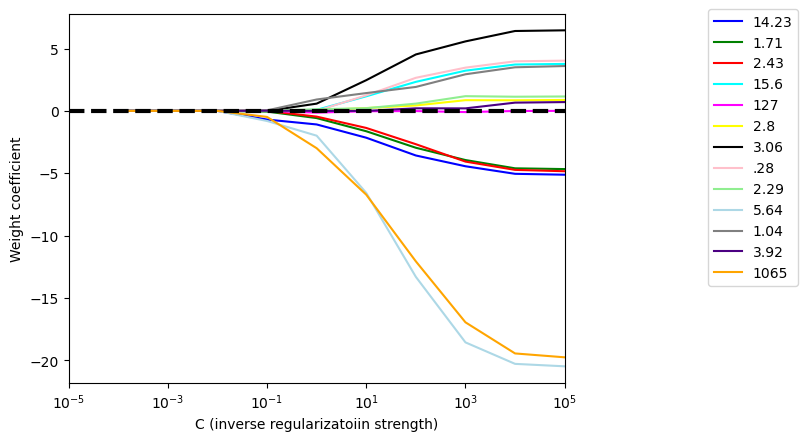

In [66]:
# L1규제는 결과적으로 데이터셋에 관련이 적은 특성이 있더라도 견고한 모델을 만들어줌
# 규제강도를 달리하여 특성의 가중치 변화를 그래프로 그려봄
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue' , 'green' , 'red' , 'cyan',
         'magenta' , 'yellow' , 'black' , 'pink' , 'lightgreen' ,
         'lightblue' , 'gray' , 'indigo' , 'orange']

weights , params = [] , []
for c in np.arange(-4. , 6.):
    lr = LogisticRegression(penalty='l1' , C = 10.**c ,
                           solver= 'liblinear',
                           multi_class = 'ovr' , random_state =0)
    lr.fit(X_train_std , y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

for column , color in zip(range(weights.shape[1]) , colors):
    plt.plot(params , weights[: , column],
            label = df.columns[column + 1],
            color = color)

plt.axhline(0 , color = 'black' , linestyle = '--' , linewidth = 3)
plt.xlim([10 ** (-5)  , 10 ** 5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularizatoiin strength)')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper center',
          bbox_to_anchor = (1.38 , 1.03),
          ncol = 1 , fancybox = True)
plt.show()

### SBS 알고리즘

In [75]:
from sklearn.base import clone
from itertools import combinations
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS: 
    def __init__(self , estimator , k_features ,
                scoring = accuracy_score ,
                test_size = 0.25 , random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size 
        self.random_state = random_state

    def fit(self ,  X , y):
        X_train , X_test , y_train , y_test = \
        train_test_split(X , y , test_size = self.test_size ,
                        random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train , y_train , 
                                X_test , y_test , self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_ , r = dim -1):
                score = self._calc_score(X_train , y_train , 
                                        X_test , y_test , p)

                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1 
            self.scores_.append(scores[best])
        self.k_score = self.scores_[-1]
        return self

    def transform(self , X):
        return X[: , self.indices_]

    def _calc_score(self , X_train , y_train , X_test , y_test , indices_):
        self.estimator.fit(X_train[: , indices_] , y_train)
        y_pred = self.estimator.predict(X_test[: , indices_])
        score = self.scoring(y_test , y_pred)
        return score

In [76]:
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn , k_features=1)
sbs.fit(X_train_std , y_train)

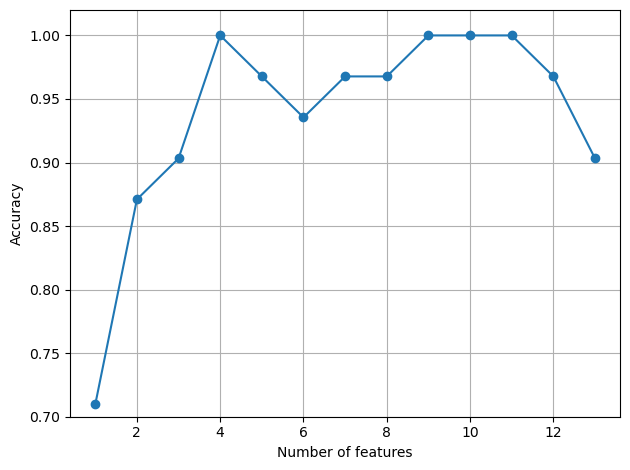

In [77]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat , sbs.scores_ , marker = 'o')
plt.ylim([0.7 , 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

# 랜덤 포레스트
- 데이터셋에서 유용한 특성을 선택함
- 앙상블에 참여한 모든 결정 트리에서 계산한 평균적인 불순도 감소로 특성 중요도를 측정할 수 있음

 1) 1065                           0.213565
 2) 3.06                           0.166822
 3) 5.64                           0.140178
 4) 3.92                           0.121524
 5) 14.23                          0.109104
 6) 1.04                           0.059554
 7) 2.8                            0.050360
 8) 15.6                           0.032400
 9) 127                            0.027268
10) 1.71                           0.025183
11) 2.29                           0.024799
12) .28                            0.017587
13) 2.43                           0.011656


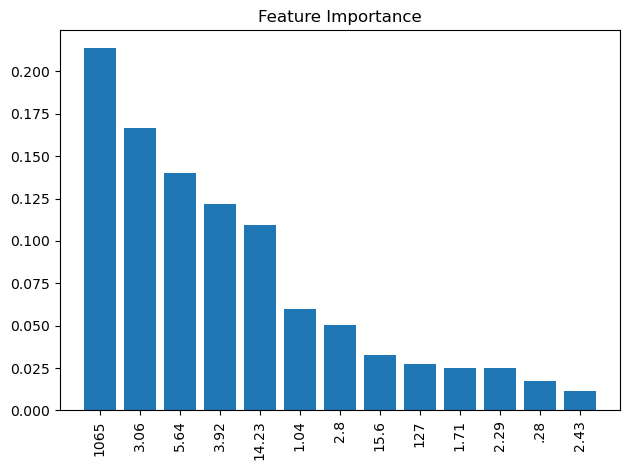

In [92]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                               random_state = 1)
forest.fit(X_train , y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' %(f + 1 , 30  , feat_labels[indices[f]],
                          importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
             importances[indices],
             align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices] , rotation=90)
plt.xlim([-1 , X_train.shape[1]])
plt.tight_layout()
plt.show()

In [95]:
# 모델 훈련이 끝난 후 사용자가 지정한 임계값을 기반으로 특성을 선택

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest , threshold = 0.1 , prefit = True)
X_selected = sfm.transform(X_train)
print('이 임계값을 만족하는 샘플의 수 :' , X_selected.shape[1])

for i in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f + 1 , 30 , feat_labels[indices[f]],
                           importances[f]))

이 임계값을 만족하는 샘플의 수 : 5
13) 2.43                           0.213565
13) 2.43                           0.213565
13) 2.43                           0.213565
13) 2.43                           0.213565
13) 2.43                           0.213565
